In [275]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statistics
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge,Lasso,LogisticRegression
import seaborn as sns
data_df=pd.read_csv("movieReplicationSet.csv")
movies=data_df[data_df.columns[:400]]
movies2=movies.copy() #data after cleaning
movie_names=movies.columns
s=movies.shape

In [276]:
for m in range(s[1]):
    for user in range(s[0]):
        if np.isnan(movies.iloc[user,m]):
            movies2.iloc[user,m]=(movies.iloc[:,m].mean()+movies.iloc[user,:].mean())/2

movies2=movies2.drop(896,axis="index")
s=movies2.shape

movies2.to_csv("new.csv",index=False)

## 1

In [277]:
df=pd.read_csv("new.csv")

In [278]:
cod=[]
for m in tqdm(range(s[1])):
    temp=[]
    for mm in range(s[1]):
        if m!=mm:
            x=df.iloc[:,mm].to_numpy()
            y=df.iloc[:,m].to_numpy()
            reg = LinearRegression().fit(x.reshape(-1,1), y)  #mm predict m
            y_hat = reg.predict(x.reshape(-1,1))
            r2 = r2_score(y,y_hat)
            temp.append(r2)
        else:
            temp.append(0)
    cod.append(temp)                                    

100%|██████████| 400/400 [00:53<00:00,  7.47it/s]


In [279]:
best=[np.max(cod[i]) for i in range(s[1])]
print(np.mean(best))

0.42378171067196035


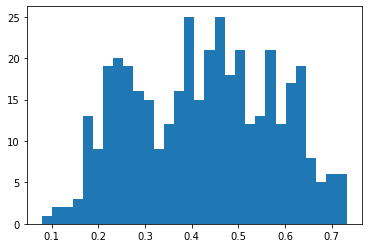

In [280]:
plt.hist(best,bins=30)
plt.show()

In [281]:
rank=np.argsort(best)
data=[[movie_names[r],np.max(cod[r]), movie_names[cod[r].index(max(cod[r]))] ] for r in rank[-10:]]
data2=[[movie_names[r],np.max(cod[r]),movie_names[cod[r].index(max(cod[r]))] ] for r in rank[0:10]]
for i in data2:
    data.append(i)
ans1 = pd.DataFrame(data, columns=['movies',"cod","best predictor"])

In [282]:
ans1

,movies,cod,best predictor
0,Heavy Traffic (1973),0.692734,Ran (1985)
1,The Final Conflict (1981),0.700188,The Lookout (2007)
2,The Straight Story (1999),0.700569,Congo (1995)
3,Congo (1995),0.700569,The Straight Story (1999)
4,The Bandit (1996),0.711222,Best Laid Plans (1999)
5,Best Laid Plans (1999),0.711222,The Bandit (1996)
6,Patton (1970),0.713554,The Lookout (2007)
7,The Lookout (2007),0.713554,Patton (1970)
8,I.Q. (1994),0.731507,Erik the Viking (1989)
9,Erik the Viking (1989),0.731507,I.Q. (1994)


## 2

In [283]:
data_df=data_df.drop(896,axis="index")

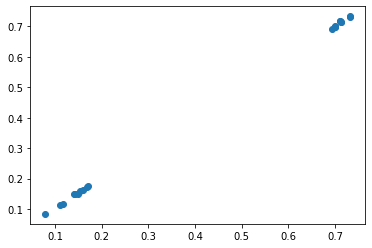

In [286]:
cod_new=[]
cod_old=[]
gender=data_df.iloc[:,-3].to_numpy()
sib=data_df.iloc[:,-2].to_numpy()
social=data_df.iloc[:,-1].to_numpy()
for m in range(20):
    best_p=ans1.iloc[m,2]
    x_best_p=df[best_p].to_numpy()
    x_with0 = np.concatenate((gender.reshape(-1,1), sib.reshape(-1,1), social.reshape(-1,1),x_best_p.reshape(-1,1)), axis=1)
    x=[]
    y_old=df[ans1["movies"][m]].to_numpy()
    y=[]
    for i in range(len(x_with0)):
        if np.isnan(x_with0[i][0])==False:
            x.append(x_with0[i])
            y.append(y_old[i])
    reg = LinearRegression().fit(x,y)
    y_hat = reg.predict(x)
    r2 = r2_score(y,y_hat)
    cod_new.append(r2)
for i in data:
    cod_old.append(i[1])
plt.scatter(cod_old,cod_new)

## 3

In [109]:
names=[]
names2=[]
for r in rank[185:215]:
    names.append(movie_names[r])#movies name in middle cod
for r in rank[216:226]:
    names2.append(movie_names[r])
mov30=df.loc[:, names]
mov10=df.loc[:, names2]
a=[int(x) for x in np.linspace(start = 1, stop = 200, num = 200)]
rmse_m=[]
r_beta=[]
r_alpha=[]

In [111]:
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

In [112]:
for i in tqdm(range(30)): 
    X_train, X_test, Y_train, Y_test = train_test_split(mov10, mov30.iloc[:,i], test_size = .20, random_state = 0)
    param_grid = {'alpha': a}
    model=Ridge()
    Ridge_reg= GridSearchCV(model, param_grid, scoring='neg_mean_squared_error',cv=5)
    Ridge_reg.fit(X_train, Y_train)
    pred=Ridge_reg.predict(X_test)
    rmse_m.append(rmse(pred,Y_test))
    r_alpha.append(Ridge_reg.best_params_['alpha'])

100%|██████████| 30/30 [00:36<00:00,  1.20s/it]


In [113]:
for i in tqdm(range(30)): 
    X_train, X_test, Y_train, Y_test = train_test_split(mov10, mov30.iloc[:,i], test_size = .20, random_state = 0)
    param_grid = {'alpha': a}
    model=Ridge(r_alpha[i])
    model.fit(X_train, Y_train)
    r_beta.append(np.round(model.coef_, 3))

100%|██████████| 30/30 [00:00<00:00, 645.76it/s]


In [118]:
ans3_1=pd.DataFrame({'Movie': names, 'Best Alpha': r_alpha, 'RSME': np.round(rmse_m, 3)}).reset_index(drop = True)
ans3_2 = pd.DataFrame(r_beta, columns = names2)
ans3 = pd.concat([ans3_1, ans3_2], axis = 1)

In [119]:
ans3

,Movie,Best Alpha,RSME,There's Something About Mary (1998),Predator (1987),Toy Story (1995),Shrek 2 (2004),Shrek (2001),Just Like Heaven (2005),Stand By Me (1986),My Best Friend's Wedding (1997),Showgirls (1995),X-Men 2 (2003)
0,Gone in Sixty Seconds (2000),24,0.338,0.177,0.064,0.019,-0.000,0.006,0.166,0.060,0.064,0.270,0.006
1,Crossroads (2002),41,0.382,0.156,0.027,-0.002,0.024,0.024,0.164,0.154,0.065,0.163,0.059
2,Austin Powers: The Spy Who Shagged Me (1999),53,0.568,0.240,0.057,0.031,0.013,0.061,0.064,0.162,0.069,0.180,0.115
3,Austin Powers in Goldmember (2002),80,0.496,0.215,0.109,-0.005,0.017,0.071,0.075,0.065,0.175,0.049,0.123
4,Goodfellas (1990),52,0.377,0.175,0.111,0.094,-0.028,0.006,0.038,0.128,0.082,0.106,0.092
5,The Big Lebowski (1998),73,0.367,0.085,0.088,0.034,0.020,0.052,0.083,0.128,0.143,0.057,0.065
6,Twister (1996),25,0.367,0.114,0.126,-0.003,-0.012,0.032,0.106,0.128,0.190,0.161,0.036
7,Blues Brothers 2000 (1998),83,0.393,0.104,0.073,0.035,0.028,-0.000,0.105,0.088,0.105,0.090,0.093
8,Dances with Wolves (1990),71,0.319,0.056,0.156,0.046,0.023,0.012,0.059,0.123,0.127,0.101,0.049
9,28 Days Later (2002),56,0.370,0.114,0.159,0.050,0.005,0.010,0.030,0.082,0.119,0.132,0.058


## 4

In [131]:
rmse_m2=[]
l_beta=[]
l_alpha=[]
a2=[round(x,5) for x in np.linspace(start = 0.0001, stop = 0.1, num = 1000)]
for i in tqdm(range(30)): 
    X_train, X_test, Y_train, Y_test = train_test_split(mov10, mov30.iloc[:,i], test_size = .20, random_state = 0)
    param_grid = {'alpha': a2}
    model=Lasso()
    Lasso_reg= GridSearchCV(model, param_grid, scoring='neg_mean_squared_error',cv=5)
    Lasso_reg.fit(X_train, Y_train)
    pred=Lasso_reg.predict(X_test)
    rmse_m2.append(rmse(pred,Y_test))
    l_alpha.append(Lasso_reg.best_params_['alpha'])

100%|██████████| 30/30 [03:10<00:00,  6.33s/it]


In [132]:
for i in tqdm(range(30)): 
    X_train, X_test, Y_train, Y_test = train_test_split(mov10, mov30.iloc[:,i], test_size = .20, random_state = 0)
    param_grid = {'alpha': a}
    model=Lasso(l_alpha[i])
    model.fit(X_train, Y_train)
    l_beta.append(np.round(model.coef_, 3))

100%|██████████| 30/30 [00:00<00:00, 613.85it/s]


In [133]:
ans4_1=pd.DataFrame({'Movie': names, 'Best Alpha': l_alpha, 'RSME': np.round(rmse_m2, 3)}).reset_index(drop = True)
ans4_2 = pd.DataFrame(l_beta, columns = names2)
ans4 = pd.concat([ans4_1, ans4_2], axis = 1)
ans4

,Movie,Best Alpha,RSME,There's Something About Mary (1998),Predator (1987),Toy Story (1995),Shrek 2 (2004),Shrek (2001),Just Like Heaven (2005),Stand By Me (1986),My Best Friend's Wedding (1997),Showgirls (1995),X-Men 2 (2003)
0,Gone in Sixty Seconds (2000),0.0061,0.341,0.183,0.050,0.016,0.000,0.001,0.164,0.038,0.046,0.313,0.000
1,Crossroads (2002),0.0032,0.384,0.170,0.003,-0.000,0.021,0.020,0.183,0.166,0.048,0.189,0.056
2,Austin Powers: The Spy Who Shagged Me (1999),0.0046,0.572,0.294,0.036,0.018,0.005,0.064,0.025,0.177,0.042,0.233,0.125
3,Austin Powers in Goldmember (2002),0.0106,0.499,0.284,0.100,-0.000,0.004,0.070,0.051,0.026,0.231,0.000,0.123
4,Goodfellas (1990),0.0036,0.375,0.210,0.121,0.091,-0.024,0.000,0.005,0.143,0.072,0.116,0.092
5,The Big Lebowski (1998),0.0016,0.365,0.088,0.095,0.021,0.016,0.052,0.088,0.162,0.202,0.031,0.054
6,Twister (1996),0.0044,0.367,0.108,0.123,-0.000,-0.000,0.019,0.096,0.127,0.210,0.168,0.023
7,Blues Brothers 2000 (1998),0.0010,0.395,0.121,0.070,0.025,0.025,-0.006,0.125,0.096,0.133,0.102,0.098
8,Dances with Wolves (1990),0.0045,0.321,0.036,0.199,0.036,0.023,0.004,0.036,0.148,0.160,0.114,0.029
9,28 Days Later (2002),0.0041,0.372,0.123,0.191,0.042,0.000,0.006,0.000,0.073,0.136,0.166,0.046


## 5

In [261]:
X = np.mean(movies, axis = 1).dropna().values
movie_m=np.mean(movies, axis = 0).dropna().values

In [272]:
s=df.shape[0]
temp=np.argsort(movie_m)
mov4_names_ind=temp[198:202]
mov4_names=[]
mov4_m=[]
label=[]
for i in mov4_names_ind:
    mov4_names.append(movie_names[i])
for m in mov4_names_ind:
    temp=[]
    median=df[movie_names[m]].median()
    for i in range(s):
        if df.iloc[i,m]<median:
            temp.append(0)
        else:
            temp.append(1)
    label.append(temp)
auc=[]
beta=[]
df5=pd.DataFrame(np.array(label).T)

Fahrenheit 9/11 (2004)
Happy Gilmore (1996)
Diamonds are Forever (1971)
Scream (1996)


([0.9545454545454546,
  0.8584078119827872,
  0.9540153833429824,
  0.8590909090909089],
 [array([[10.28532939]]),
  array([[5.96005022]]),
  array([[10.33151309]]),
  array([[4.97839277]])])

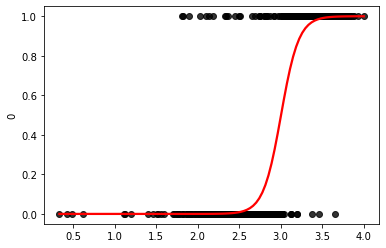

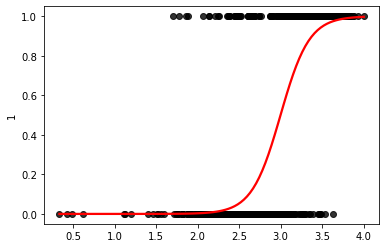

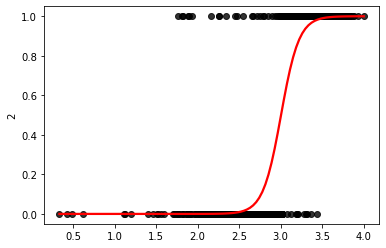

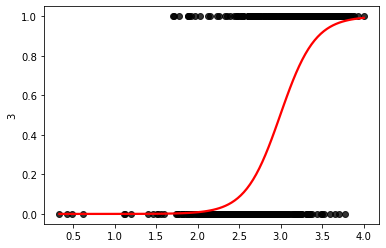

In [273]:
for i in range(4):
    X_train, X_test, Y_train, Y_test = train_test_split(X.reshape(-1,1), df5.iloc[:,i], test_size = .20, random_state = 0)
    params = {'penalty': ['l2', 'none']}
    model = LogisticRegression()
    l = GridSearchCV(model, params)
    l=l.fit(X_train, Y_train)
    pred = l.predict(X_test)
    auc.append(roc_auc_score(Y_test, pred))
    beta.append(l.best_estimator_.fit(X_train, Y_train).coef_)
    plt.figure(i)
    print(mov4_names[i])
    sns.regplot(x = X.reshape(-1,1), y = df5.iloc[:,i], logistic = True, ci = None, scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'},label=mov4_names[i])
auc, beta

## Extra Credit

In [305]:
cry=data_df.iloc[:,-13].fillna(0).to_numpy()

In [308]:
X_train,X_test, Y_train,Y_test=train_test_split(X.reshape(-1,1),cry,test_size=0.1, random_state=0)
model=LinearRegression()
m=model.fit(X_train,Y_train)
y_pred=m.predict(X_test)
print(r2_score(Y_test,y_pred))

-0.02279679188691408
